In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("income.csv")  
df.head(10)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [5]:
df.columns

Index(['Name', 'Age', 'Income($)'], dtype='object')

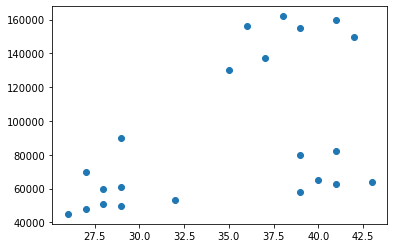

In [6]:
plt.scatter(df['Age'],df['Income($)'])

In [9]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [15]:
y=km.fit_predict(df[['Age','Income($)']])

In [16]:
y

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [18]:
df['cluter']=y
df.head(10)

,Name,Age,Income($),cluter
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


<function matplotlib.pyplot.legend(*args, **kwargs)>

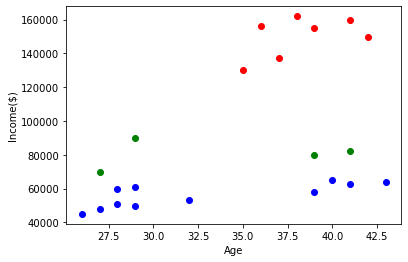

In [24]:
df1=df[df.cluter==0]
df2=df[df.cluter==1]
df3=df[df.cluter==2]

plt.scatter(df1.Age,df1['Income($)'], color='green')
plt.scatter(df2.Age,df2['Income($)'], color='red')
plt.scatter(df3.Age,df3['Income($)'], color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend    


In [41]:
scaler=MinMaxScaler()

In [45]:
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])               
                                    


In [50]:
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df                                    

,Name,Age,Income($),cluter
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [51]:
km=KMeans(n_clusters=3)

In [52]:
y_predicted=km.fit_predict(df[['Age','Income($)']])

In [53]:
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [54]:
df['cluster']=y_predicted

In [56]:
df.drop('cluter',axis='columns',inplace=True)

In [58]:
df.head(10)

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [59]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

<function matplotlib.pyplot.legend(*args, **kwargs)>

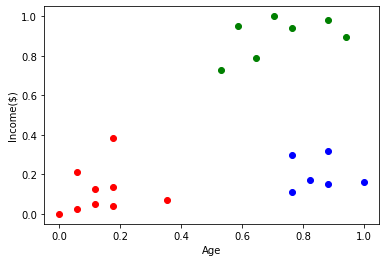

In [61]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'], color='green')
plt.scatter(df2.Age,df2['Income($)'], color='red')
plt.scatter(df3.Age,df3['Income($)'], color='blue')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend    


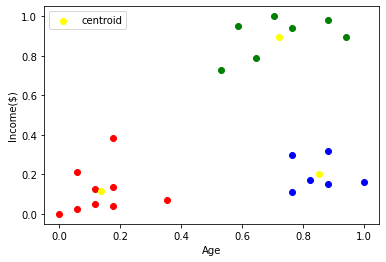

In [64]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'], color='green')
plt.scatter(df2.Age,df2['Income($)'], color='red')
plt.scatter(df3.Age,df3['Income($)'], color='blue')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='yellow',label='centroid')


plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend() 


In [66]:
k_rng=range(1,10)
SSE=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    SSE.append(km.inertia_)

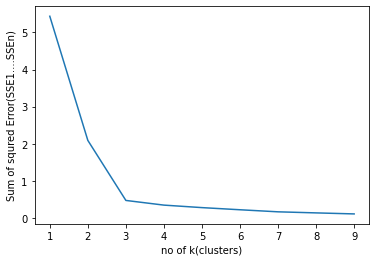

In [67]:
plt.xlabel('no of k(clusters)')
plt.ylabel('Sum of squred Error(SSE1....SSEn)')
plt.plot(k_rng,SSE)